# Index

- [1. Movies their review and success factors](#1-Movies-and-their-review-and-success-factors)
  - [1.1 Notebook Overview](#1.1-Notebook-Overview)
  - [1.2 Problem Statement](#1.2-Problem-Statement)
  - [1.3 Hypothesis](#1.3-Hypothesis)
  - [1.4 Objectives](#1.4-Objectives)

- [2. Main file](#2-importing-libraries-and-datasets)
  - [2.1 Data Sending from MySQL to Python](#2.1-Data-Sending-from-MySQL-to-Python)
  - [2.2 Queries](#2.2-Queries)
    - [2.2.1 Queries for the Hypothesis 1](#2.2.1-Queries-for-the-Hypothesis-1)
    - [2.2.2 Queries for the Hypothesis 2](#2.2.2-Queries-for-the-Hypothesis-2)
    - [2.2.3 Queries for the Hypothesis 3](#2.2.2-Queries-for-the-Hypothesis-3)

- [3. Hypotheses Testing Visualisation](#3-Hypotheses-Testing-Visualisation)
  - [3.1 Optimal Movie Runtime and Success Metrics](#3.1-Optimal-Movie-Runtime-and-Success-Metrics)
  - [3.2 Revenue Difference Between Action and War Genres](#3.2-Revenue-Difference-Between-Action-and-War-Genres)
  - [3.3 Impact on Budget on User Ratings](#3.3-Impact-on-Budget-on-User-Ratings)

# 1. Movies their review and success factors

## 1.1 Notebook Overview

- In this notebook, we show you the queries that we did in our database that we created in order to get the answers that we need according to our hypothesis. Our database is about movies and their respective ratings according to the IMDB and their users, for more information about our database check out the SQL folder!


## 1.2 Problem Statement

- How can various factours affect the success and the review of movies ?

## 1.3 Hypothesis

- Optimal Movie Runtime and Success Metrics
- Revenue Difference Between Action and War Genres
- Impact of Budget on User Ratings

## 1.4 Objectives

- This analysis seek to explore various factors affecting the success and the reception of movies.
- Every information gathered in this analysis can be used by companies or consumers in order to improve in some way the success of movies production. 

# 2. Main file

### 2.1 Data Sending from MySQL to Python

In [2]:
import pandas as pd

In [3]:
user = "root"
password = "Admin149."
host = "127.0.0.1"
port = "3306"
db = "movies_schema"
from sqlalchemy import create_engine, text
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{db}')

## 2.2 Queries

- To test our hypothesis we had to gather information from our database which is called 'movies_schema'. In order to do that we had to do some queries to our database.


### 2.2.1 Queries for the Hypothesis 1 

In [4]:
# Define your queries
query1 = """
SELECT 
    MIN(runtime) AS min_runtime,
    MAX(runtime) AS max_runtime,
    AVG(runtime) AS avg_runtime
FROM movies_schema.movies_metadata;
"""

query2 = """
SELECT 
    CASE 
        WHEN runtime BETWEEN 0 AND 90 THEN '0-1h30'
        WHEN runtime BETWEEN 91 AND 120 THEN '1h30-2h'
        WHEN runtime BETWEEN 121 AND 180 THEN '2h-3h'
        ELSE 'Over 3h'
    END AS runtime_range,
    AVG(popularity) AS avg_popularity
FROM movies_schema.movies_metadata
GROUP BY runtime_range
ORDER BY runtime_range;
"""

# Create a connection
connection = engine.connect()

# Execute the first query and read the result into a DataFrame
hypothesis_1_1_df = pd.read_sql_query(query1, connection)

# Execute the second query and read the result into another DataFrame
hypothesis_1_df = pd.read_sql_query(query2, connection)

# Close the database connection
connection.close()

# Print the results
print("Query 1 Results:")
print(hypothesis_1_1_df.head())
print("\nQuery 2 Results:")
print(hypothesis_1_df.head())

Query 1 Results:
   min_runtime  max_runtime  avg_runtime
0          0.0       1140.0    105.69568

Query 2 Results:
  runtime_range  avg_popularity
0        0-1h30         5.38588
1       1h30-2h         7.16357
2         2h-3h         9.94890
3       Over 3h         7.70918


### 2.2.2 Queries for the Hypothesis 2 

In [13]:
# Define your queries
query3 = """
SELECT 
    genres AS genre,
    ROUND(AVG(revenue), 2) AS average_revenue
FROM 
    movies_schema.movies_metadata
WHERE 
    genres IS NOT NULL AND genres <> '' AND revenue IS NOT NULL
GROUP BY 
    genres
HAVING 
    AVG(revenue) IS NOT NULL
    AND AVG(revenue) > 0 -- Filter out genres with average revenue of 0
ORDER BY 
    average_revenue DESC;
"""

# Create a connection
connection = engine.connect()

# Execute the query and read the result into a DataFrame
hypothesis_2_df = pd.read_sql_query(query3, connection)



# Close the database connection
connection.close()

# Print the results
print("Query 3 Results:")
print(hypothesis_2_df.head())

Query 3 Results:
             genre  average_revenue
0        Adventure     1.504441e+08
1        Animation     1.404673e+08
2  Science Fiction     1.351056e+08
3           Family     1.345392e+08
4           Action     8.742986e+07


### 2.2.3 Queries for the Hypothesis 3 

In [8]:
query4 = """
SELECT 
    m.title,
    m.budget,
    ROUND(AVG(r.rating), 1) AS average_rating
FROM 
    movies_schema.movies_metadata m
JOIN 
    (SELECT DISTINCT movieId, userId, rating FROM movies_schema.ratings_small) r ON m.id = r.movieId
WHERE 
    m.budget IS NOT NULL
GROUP BY
    m.title,
    m.budget
ORDER BY 
    m.budget DESC
LIMIT 15;
"""

In [19]:
# Create a connection
connection = engine.connect()

# Execute the query and read the result into a DataFrame
hypothesis_3_df = pd.read_sql_query(query4, connection)

# Close the database connection
connection.close()

# Print the results
print("Query 4 Results:")
print(hypothesis_3_df.head())

Query 4 Results:
                                         title     budget  average_rating
0  Pirates of the Caribbean: On Stranger Tides  380000000             4.0
1     Pirates of the Caribbean: At World's End  300000000             4.0
2                                 Spider-Man 3  258000000             5.0
3       Harry Potter and the Half-Blood Prince  250000000             4.0
4     The Chronicles of Narnia: Prince Caspian  225000000             3.7


## 3. Hypotheses Testing Visualisation

### 3.1 Optimal Movie Runtime and Success Metrics




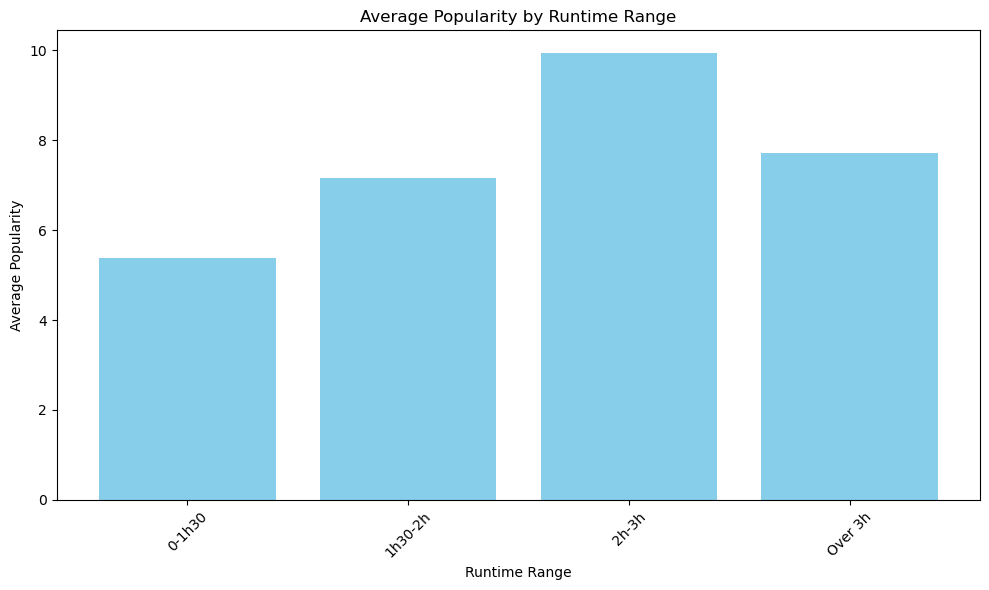

In [5]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hypothesis_1_df['runtime_range'], hypothesis_1_df['avg_popularity'], color='skyblue')
plt.xlabel('Runtime Range')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Runtime Range')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

- According to our analysis there is actually a runtime that correlates with higher popularity which corresponds to a film with a duration in between of 2 to 3h.

### 3.2 Revenue Difference Between Action and War Genres

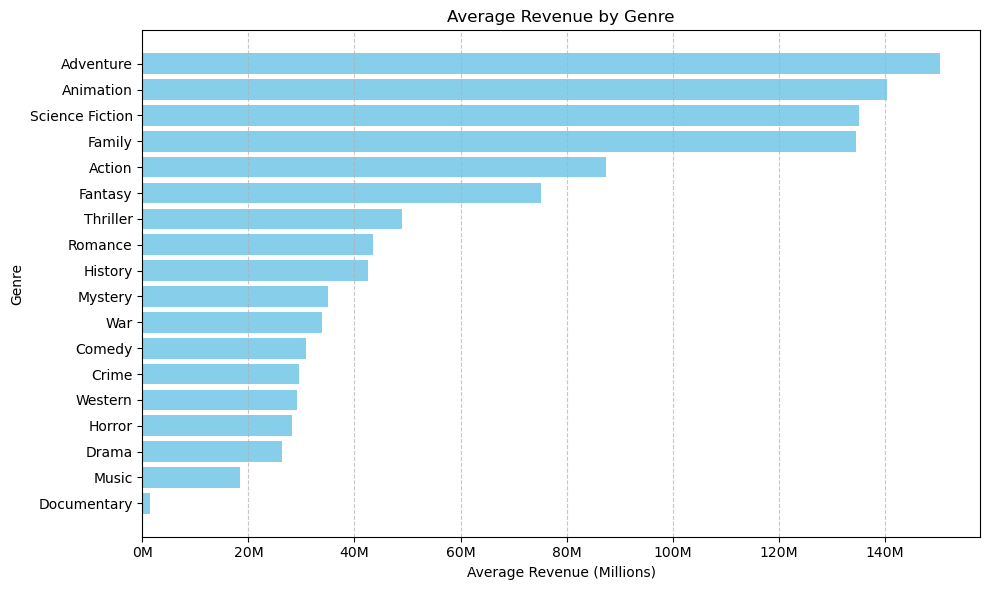

In [14]:
from matplotlib.ticker import FuncFormatter

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(hypothesis_2_df['genre'], hypothesis_2_df['average_revenue'], color='skyblue')

# Function to format x-axis labels to display millions in a concise format (e.g., 20M instead of 20000000M)
def millions_formatter(x, pos):
    # Divide x by 1,000,000 to convert it back to millions for display
    return f'{int(x / 1000000)}M'

# Set the formatter for x-axis labels
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Average Revenue (Millions)')
plt.ylabel('Genre')
plt.title('Average Revenue by Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have highest revenue at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display plot
plt.show()

- As we can check Action genres films actually generates more revenue than War movies, even though our hypothesis was that they eventually were more even

### 3.3 Impact on Budget on User Ratings

In [18]:
import plotly.express as px

# Plotting with Plotly
fig = px.bar(hypothesis_3_df, 
             x='average_rating',  # Inverted: average rating on x-axis
             y='title',           # Movies titles on y-axis
             text='budget',       # Show budget as text annotations
             title='Top 15 Movies with Highest Budget and Their Average Ratings',
             labels={'average_rating': 'Average Rating', 'title': 'Movie Title', 'budget': 'Budget (in USD)'},
             height=600,
             orientation='h')     # Horizontal bar plot

# Format x-axis as one decimal place for average rating
fig.update_layout(xaxis_tickformat='.1f')

# Add annotations for budget on each bar
fig.update_traces(texttemplate='$%{text:.2s}', textposition='outside')

# Show plot
fig.show()

- These are the top15 movies with the biggest budget according to our database. Even though they have a lot of budget it doesn't mean that they have great reviews.